## RNN Learning Experiments

### 1. Learn diff bewteen Min and Max. `max(seq) - min(seq)`

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 512
D = 20
x = (np.random.random((N,D)) - 0.5) * 2.0
w = np.random.random(D).reshape((D,1))
y = (x@w).flatten()
print(x.shape, y.shape)

(512, 20) (512,)


In [3]:
# x[0], w, y[0]

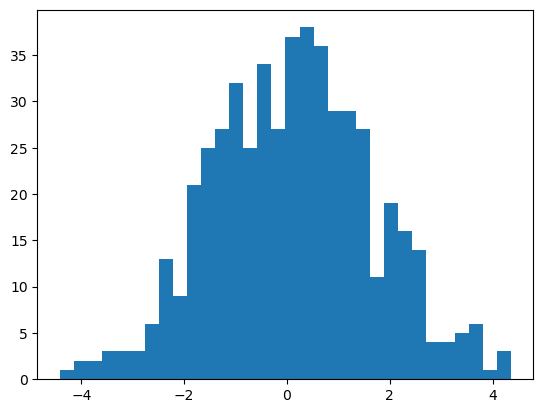

In [4]:
_= plt.hist(y, bins=32)

In [9]:
def create_model(input_dim):
    keras.backend.clear_session()
    model = keras.models.Sequential([
        tf.keras.layers.Reshape((input_dim, 1),  input_shape=(input_dim,)),
        keras.layers.LSTM(1, recurrent_activation="relu")
    ])

    model.compile(loss="mse", optimizer="adam", metrics=["mse"])

    model.summary()

    return model

model = create_model(input_dim=D)
hist = model.fit( x,y, batch_size=16, epochs=100,verbose=1, validation_split=0.125)
hdf = pd.DataFrame(hist.history)
hdf.plot()
hdf.tail(10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 20, 1)             0         
                                                                 
 lstm (LSTM)                 (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
28/28 [==============================] - 2s 62ms/step - loss: 2.5253 - mse: 2.5253 - val_loss: 2.2295 - val_mse: 2.2295
Epoch 2/100
28/28 [==============================] - 1s 52ms/step - loss: 2.5196 - mse: 2.5196 - val_loss: 2.2297 - val_mse: 2.2297
Epoch 3/100
28/28 [==============================] - 1s 52ms/step - loss: 2.5164 - mse: 2.5164 - val_loss: 2.2302 - val_mse: 2.2302
Epoch 4/100
28/28 [==============================] - 2s 56ms

KeyboardInterrupt: 

In [6]:
model.predict(x[:5]), y[:5] 

1/1 [==============================] - 0s 269ms/step


(array([[ 0.86740774],
        [-0.44046977],
        [-0.75929314],
        [ 0.54484475],
        [-0.7954091 ]], dtype=float32),
 array([ 1.39024676, -0.3513331 , -1.51444589,  0.99917448, -1.88631181]))